In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

%matplotlib inline

In [2]:
results = np.genfromtxt('../dace1/case_output.dat',comments='%')

In [3]:
results.shape

(20, 6)

In [4]:
def get_center(image):

    # make grayscale
    img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    #blur
    img = cv.medianBlur(img, 5)
    # look for circles
    circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 150, 
                              param1=50, param2=30, minRadius=200, maxRadius=0)
    
    # round to pixel
    circles = np.uint16(np.around(circles))

    cx=circles[0][0][0]
    cy=circles[0][0][1]
    radius=circles[0][0][2]
    
    return cx, cy ,radius

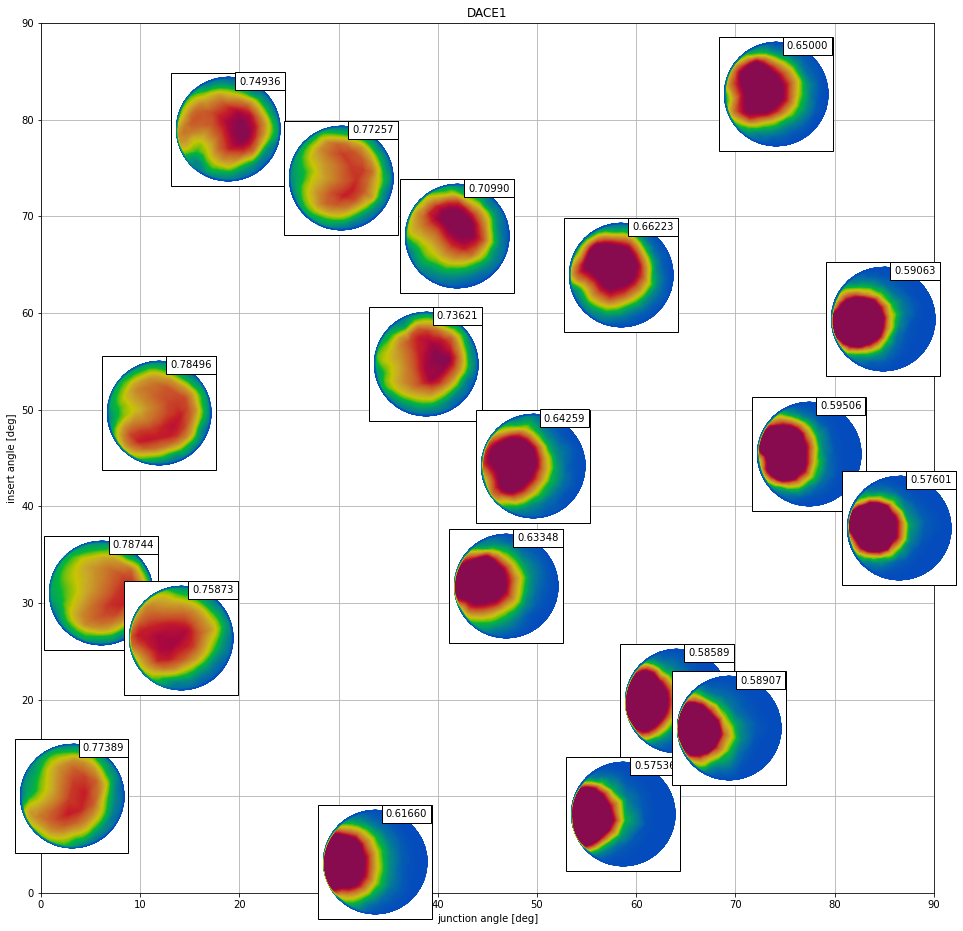

In [15]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_xlim(0, 90)
ax.set_ylim(0, 90)

for i in range(results.shape[0]):
    if i == 0:
        im = cv.imread('../dace1/workdir.1/image_bench.png', cv.IMREAD_COLOR)
        cx, cy, radius = get_center(im)
        R = radius+2
        
    if results[i,5] > 0:
        img = plt.imread('../dace1/workdir.'+str(int(results[i,0]))+'/image_01.png')
        
        imagebox = OffsetImage(img[cy-R:cy+R,cx-R:cx+R,:], zoom=0.15)

        ab = AnnotationBbox(imagebox, (results[i,2], results[i,3]))

        ax.add_artist(ab)
        
        offsetbox = TextArea(f"{results[i,4]:.5f}")
        
        ab1 = AnnotationBbox(offsetbox, (results[i,2],results[i,3]),
                             xybox=(32, 48),
                             xycoords='data',
                             boxcoords="offset points",
                             #arrowprops=dict(arrowstyle="->")
                            )
        
        ax.add_artist(ab1)

        

plt.grid()

plt.xlabel('junction angle [deg]')
plt.ylabel('insert angle [deg]')
plt.title('DACE1')

plt.draw()
plt.savefig('dace1.png',dpi=200)
        
